In [1]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import uproot

In [2]:
fname = "4531AE5A-5C3B-F446-A0E3-B9DAA19B87C5.root"

In [3]:
with uproot.open(fname, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    Events = Tree.arrays(library="ak", how="zip")

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [4]:
Events.fields

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'btagWeight_CSVV2',
 'btagWeight_DeepCSVB',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'DeepMETResolutionTune_phi',
 'DeepMETResolutionTune_pt',
 'DeepMETResponseTune_phi',
 'DeepMETResponseTune_pt',
 'nElectron',
 'nFatJet',
 'nFsrPhoton',
 'nGenJetAK8',
 'nGenJet',
 'nGenPart',
 'nSubGenJetAK8',
 'Generator_binvar',
 'Generator_scalePDF',
 'Generator_weight',
 'Generator_x1',
 'Generator_x2',
 'Generator_xpdf1',
 'Generator_xpdf2',
 'Generator_id1'

In [4]:
gen = Events.GenPart

In [6]:
W = gen[(abs(gen.pdgId) == 24)]

In [7]:
W.pt

<Array [[72, 70, 69.2, ..., 69.5, 69.8], ...] type='736000 * var * float32'>

In [8]:
np.unique(ak.flatten(W.status))

<Array [22, 44, 51, 52, 62] type='5 * int32'>

In [9]:
W = W[W.status == 62]

In [10]:
ak.all(ak.num(W.pt)==1)

True

In [11]:
W.pt

<Array [[69.8], [20], [42.8], ..., [14.9], [117]] type='736000 * var * float32'>

In [12]:
mu = gen[(abs(gen.pdgId) == 13) & (gen.status == 1)]

In [13]:
mu.pt

<Array [[55.1], [30.8], ..., [...], [126, 10.1]] type='736000 * var * float32'>

In [140]:
mu = gen[(abs(gen.pdgId) == 13) & ((gen.status == 23) | (gen.status == 1))]
mother_idx = mu.genPartIdxMother
mask = abs(gen[mother_idx].pdgId) == 24
mu = mu[mask]

In [146]:
# all muons
muons = gen[abs(gen.pdgId) == 13]

# status=1 candidates
mu1 = muons[muons.status == 1]

# status=23 candidates
mu23 = muons[muons.status == 23]

# masks for W and mu23
is_W    = abs(gen.pdgId) == 24
is_mu23 = (abs(gen.pdgId) == 13) & (gen.status == 23)

# mu23 mother index
mu23_mother = gen.genPartIdxMother

# mu23 is from W if its mother is a W
mu23_from_W = is_mu23 & is_W[mu23_mother]

mu1 = gen[(abs(gen.pdgId) == 13) & (gen.status == 1)]
mu1_mother = mu1.genPartIdxMother

# condition A: mu1 mother is W
from_W = is_W[mu1_mother]

# condition B: mu1 mother is a mu23-from-W
from_mu23_from_W = mu23_from_W[mu1_mother]

# final selection
mu1_sel = mu1[from_W | from_mu23_from_W]

In [148]:
mu1_sel = mu1_sel[ak.num(mu1_sel.pt) > 0]

In [149]:
mu1_sel.pt

<Array [[55.1], [30.8], ..., [32.9], [126]] type='238102 * var * float32'>

In [141]:
mu_pt = mu.pt

In [143]:
mu_pt = mu.pt[ak.num(mu.pt)>0]

In [144]:
mu_pt

<Array [[55.1], [30.8], ..., [32.9], [126]] type='244878 * var * float32'>

In [46]:
np.unique(ak.flatten(mu.status))

<Array [1, 23, 44, 51, 52] type='5 * int32'>

In [94]:
mu_1 = mu[mu.status == 1]
mu_23 = mu[mu.status == 23]
mu_44 = mu[mu.status == 44]
mu_51 = mu[mu.status == 51]
mu_52 = mu[mu.status == 52]

In [64]:
mu.pt

<Array [[55.1], [30.8], [], ..., [], [32.9], []] type='736000 * var * float32'>

In [49]:
ak.sum(ak.num(mu.status == 23))

244938

In [95]:
mu_1 = mu_1[ak.num(mu_1) > 0]
mu_23 = mu_23[ak.num(mu_23) > 0]
mu_44 = mu_44[ak.num(mu_44) > 0]
mu_51 = mu_51[ak.num(mu_51) > 0]
mu_52 = mu_52[ak.num(mu_52) > 0]

In [83]:
mu_52

<Array [[{eta: -1.68, mass: 0, ...}], ...] type='7 * var * {eta: float32, m...'>

In [96]:
mu_1_pt = mu_1.pt
mu_23_pt = mu_23.pt
mu_44_pt = mu_44.pt
mu_51_pt = mu_51.pt
mu_52_pt = mu_52.pt

In [85]:
mu_1_pt

<Array [[55.1], [30.8], ..., [14.1], [32.9]] type='129782 * var * float32'>

In [86]:
mu_23_pt

<Array [[128], [17.1], ..., [21.3], [126]] type='115096 * var * float32'>

In [87]:
mu_44_pt

<Array [[5.11, 8.47], [9.22, ...], [2.83, 2.38]] type='3 * var * float32'>

In [88]:
mu_52_pt

<Array [[10.3], [3.68], [32.9], ..., [2.64], [1.44]] type='7 * var * float32'>

In [97]:
mu_51_pt

<Array [[309, 12.5], [0.977, ...], ..., [8.62, 17.4]] type='27 * var * float32'>

In [113]:
import awkward as ak

# muons
muons = gen[abs(gen.pdgId) == 13]

# mu23 candidates
mu23 = muons[muons.status == 23]

# mu1 candidates
mu1  = muons[muons.status == 1]

# local index into gen
idx = ak.local_index(gen)

# identify W bosons
is_W = abs(gen.pdgId) == 24

# --- Step 1: mu23 must come from W ---
mu23_from_W = is_W[mu23.genPartIdxMother]

# --- Step 2: mu1 must come from mu23 ---
is_mu23 = (abs(gen.pdgId) == 13) & (gen.status == 23)
mu1_from_mu23 = is_mu23[mu1.genPartIdxMother]

# --- Step 3: Event-level conditions ---
has_mu23_from_W = ak.any(mu23_from_W, axis=-1)
has_mu1_from_mu23 = ak.any(mu1_from_mu23, axis=-1)

# final mask
mask = has_mu23_from_W & has_mu1_from_mu23
selected_events = gen[mask]




In [114]:
selected_events.pt

<Array [[0, 0, 162, ..., 0.562, 7.12, 0.84], ...] type='108320 * var * float32'>

In [116]:
# muons
muons = gen[abs(gen.pdgId) == 13]
mu23  = muons[muons.status == 23]
mu1   = muons[muons.status == 1]

is_W    = abs(gen.pdgId) == 24
is_mu23 = (abs(gen.pdgId) == 13) & (gen.status == 23)

# mu23 from W
mu23_from_W = is_W[mu23.genPartIdxMother]

# mu1 from mu23
mu1_from_mu23 = is_mu23[mu1.genPartIdxMother]

# event selection
mask = ak.any(mu23_from_W, axis=-1) & ak.any(mu1_from_mu23, axis=-1)


# select only mu23 with W mother
mu23_sel = mu23[mu23_from_W]

# select only mu1 with mu23 mother
mu1_sel = mu1[mu1_from_mu23]

# apply event mask (drop irrelevant events)
mu23_sel = mu23_sel[mask]
mu1_sel  = mu1_sel[mask]


In [117]:
mu23_sel.pt

<Array [[128], [17.1], ..., [21.3], [126]] type='108320 * var * float32'>

In [121]:
mu1_sel.pt

<Array [[128], [17.1], ..., [21.3], [126]] type='108320 * var * float32'>

In [130]:
pt_percent_diff = (mu23_sel.pt - mu1_sel.pt)/mu23_sel.pt *100

In [138]:
ak.where(pt_percent_diff > 10)

(<Array [24, 33, 43, 53, ..., 108239, 108264, 108302] type='7693 * int64'>,
 <Array [0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0] type='7693 * int64'>)

In [132]:
pt_percent_diff[53]

<Array [57.6] type='1 * float32'>

In [ ]:
mu_23_pt

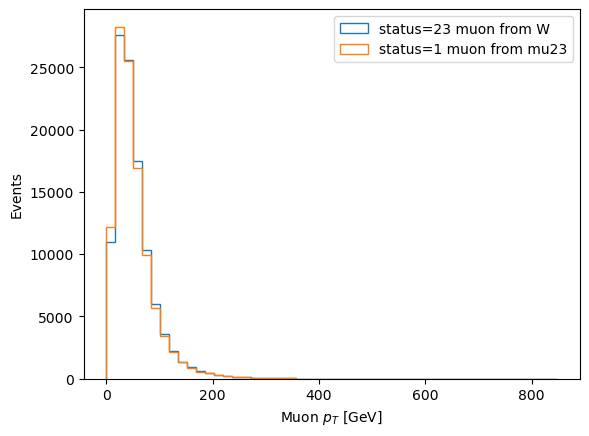

In [124]:
import matplotlib.pyplot as plt

plt.hist(mu23_sel.pt.to_numpy(), bins=50, histtype="step", label="status=23 muon from W")
plt.hist(mu1_sel.pt.to_numpy(),  bins=50, histtype="step", label="status=1 muon from mu23")
plt.xlabel("Muon $p_T$ [GeV]")
plt.ylabel("Events")
plt.legend()
plt.show()


In [66]:
mu_pt

<Array [[55.1], [30.8], ..., [32.9], [126]] type='244900 * var * float32'>

In [38]:
mu_pt_nonempty = mu_pt[ak.num(mu_pt) > 0]

In [39]:
mu_pt_nonempty

<Array [[55.1], [30.8], ..., [14.1], [32.9]] type='129782 * var * float32'>

In [25]:
mu_pt

<Array [[55.1], [30.8], [], ..., [32.9], [126]] type='736000 * var * float32'>

In [20]:
mask

<Array [True, True, True, True, ..., True, True, True] type='736000 * bool'>

In [156]:
electron = gen[(abs(gen.pdgId) == 11)]
mother_idx = electron.genPartIdxMother
mask = abs(gen[mother_idx].pdgId) == 24
electron = electron[mask]

In [160]:
np.unique(ak.flatten(electron.status))

<Array [1, 23] type='2 * int32'>

In [5]:
# all muons
electrons = gen[abs(gen.pdgId) == 11]

# status=1 candidates
ele1 = electrons[electrons.status == 1]

# status=23 candidates
ele23 = electrons[electrons.status == 23]

# masks for W and mu23
is_W    = abs(gen.pdgId) == 24
is_ele23 = (abs(gen.pdgId) == 11) & (gen.status == 23)

# mu23 mother index
ele23_mother = gen.genPartIdxMother

# mu23 is from W if its mother is a W
ele23_from_W = is_ele23 & is_W[ele23_mother]

ele1 = gen[(abs(gen.pdgId) == 11) & (gen.status == 1)]
ele1_mother = ele1.genPartIdxMother

# condition A: mu1 mother is W
from_W = is_W[ele1_mother]

# condition B: mu1 mother is a mu23-from-W
from_ele23_from_W = ele23_from_W[ele1_mother]

# final selection
ele1_sel = ele1[from_W | from_ele23_from_W]

In [164]:
ele1_sel[ak.num(ele1_sel.pt) > 0].pt

<Array [[53.4], [83.8], [125], ..., [67.2], [38]] type='245652 * var * float32'>

In [165]:
taus = gen[(abs(gen.pdgId) == 15)]
mother_idx = taus.genPartIdxMother
mask = abs(gen[mother_idx].pdgId) == 24
taus = taus[mask]

In [168]:
np.unique(ak.flatten(taus.status))

<Array [2, 23] type='2 * int32'>

In [169]:
# all muons
taus = gen[abs(gen.pdgId) == 15]

# status=1 candidates
tau2 = taus[taus.status == 2]

# status=23 candidates
tau23 = taus[taus.status == 23]

# masks for W and mu23
is_W    = abs(gen.pdgId) == 24
is_tau23 = (abs(gen.pdgId) == 15) & (gen.status == 23)

# mu23 mother index
tau23_mother = gen.genPartIdxMother

# mu23 is from W if its mother is a W
tau23_from_W = is_tau23 & is_W[tau23_mother]

tau2 = gen[(abs(gen.pdgId) == 15) & (gen.status == 2)]
tau2_mother = tau2.genPartIdxMother

# condition A: mu1 mother is W
from_W = is_W[tau2_mother]

# condition B: mu1 mother is a mu23-from-W
from_tau23_from_W = tau23_from_W[tau2_mother]

# final selection
tau1_sel = tau2[from_W | from_tau23_from_W]

In [172]:
tau1_sel = tau1_sel[ak.num(tau1_sel) > 0].pt

In [173]:
tau1_sel

<Array [[162], [41.5], [25.8], ..., [34.4], [85]] type='245581 * var * float32'>

In [174]:
reco_electrons = Events.Electron

In [177]:
reco_muons = Events.Muon

In [176]:
reco_electrons.pt

<Array [[], [], [34], ..., [], [5.18], [7.19]] type='736000 * var * float32'>

In [178]:
reco_muons.pt

<Array [[55.8], [30.8], ..., [32.7], [124, 9.72]] type='736000 * var * float32'>

In [179]:
reco_taus = Events.Tau

In [180]:
reco_taus.pt

<Array [[55.8], [30.8], ..., [32.7], [124]] type='736000 * var * float32'>

In [6]:
ele1_sel = ele1_sel[ak.num(ele1_sel.pt) > 0]
sorted_electrons = ele1_sel[ak.argsort(ele1_sel.pt, axis=1, ascending=False)]
lead_pt_ele_gen = sorted_electrons.pt[:, 0]
lead_eta_ele_gen = sorted_electrons.eta[:, 0]
lead_phi_ele_gen = sorted_electrons.phi[:, 0]

reco_electrons = Events.Electron[ak.num(ele1_sel.pt) > 0]
has_electron = ak.num(reco_electrons) >= 1
Reco_electrons_all = reco_electrons[has_electron]
Reco_ele_pt = ak.flatten(reco_electrons.pt)
Reco_ele_eta = ak.flatten(reco_electrons.eta)
Reco_ele_phi = ak.flatten(reco_electrons.phi)

Reco_ele_pt_uf = reco_electrons.pt
Reco_ele_eta_uf = reco_electrons.eta
Reco_ele_phi_uf = reco_electrons.phi

sorted_reco_electrons = reco_electrons[ak.argsort(reco_electrons.pt, axis=1, ascending=False)]
Sorted_reco_electrons_all = Reco_electrons_all[ak.argsort(Reco_electrons_all.pt, axis=1, ascending=False)]

Reco_electron_lead_pt_all = Sorted_reco_electrons_all.pt[:,0]
Reco_electron_lead_eta_all = Sorted_reco_electrons_all.eta[:,0]
Reco_electron_lead_phi_all = Sorted_reco_electrons_all.phi[:,0]

def dR(eta1, phi1, eta2, phi2):
    d_eta = eta1 - eta2
    d_phi = phi1 - phi2
    return np.sqrt(d_eta**2 + d_phi**2)

dR_ele_lead = dR(lead_eta_ele_gen, lead_phi_ele_gen, Reco_ele_eta_uf, Reco_ele_phi_uf)

min_idx_1 = ak.argmin(dR_ele_lead, axis=1)

photon_idx = ak.local_index(reco_electrons)
mask_idx_1 = photon_idx == min_idx_1[:, None]

mask_dR_1 = dR_ele_lead < 0.1

mask_sel_1 = mask_idx_1 & mask_dR_1

reco_electrons = reco_electrons

selected_electron_1 = ak.firsts(reco_electrons[mask_sel_1])

Genmatched_ele_1_pt  = ak.to_numpy(ak.fill_none(selected_electron_1.pt,  np.nan))
Genmatched_ele_1_eta = ak.to_numpy(ak.fill_none(selected_electron_1.eta, np.nan))
Genmatched_ele_1_phi = ak.to_numpy(ak.fill_none(selected_electron_1.phi, np.nan))

In [217]:
sorted_electrons.pt

<Array [[53.4], [83.8], [125], ..., [67.2], [38]] type='245652 * var * float32'>

In [7]:
# events where all entries are valid
event_mask_all = ak.sum(~np.isnan(Genmatched_ele_1_pt), axis=-1)

# events where at least one entry is valid
event_mask_any = ak.any(~np.isnan(Genmatched_ele_1_pt), axis=-1)


In [8]:
event_mask_all

160

In [9]:
lead_pt_ele_gen

<Array [53.4, 83.8, 125, 37.2, ..., 106, 67.2, 38] type='245652 * float32'>

In [10]:
Reco_ele_pt_uf

<Array [[], [], [34], ..., [], [9.28], [12]] type='245652 * var * float32'>

In [193]:
Reco_electrons_all.pt

<Array [[34], [80.7], [128], ..., [5.18], [7.19]] type='449235 * var * float32'>

In [ ]:
# --- Select GEN electrons ---
gen = Events.GenPart

is_ele1 = (abs(gen.pdgId) == 11) & (gen.status == 1)
is_ele23 = (abs(gen.pdgId) == 11) & (gen.status == 23)
is_W = abs(gen.pdgId) == 24

ele1 = gen[is_ele1]
ele23_from_W = is_ele23 & is_W[gen.genPartIdxMother]

from_W = is_W[ele1.genPartIdxMother]
from_ele23_from_W = ele23_from_W[ele1.genPartIdxMother]

ele1_sel = ele1[from_W | from_ele23_from_W]   # final GEN electrons

# --- Reco electrons ---
reco_electrons = Events.Electron

# --- Build pairwise ΔR ---
def delta_r(eta1, phi1, eta2, phi2):
    dphi = (phi1 - phi2 + np.pi) % (2 * np.pi) - np.pi
    deta = eta1 - eta2
    return np.sqrt(deta**2 + dphi**2)

# pairwise ΔR between each gen-ele1_sel and all reco electrons
dr = delta_r(
    ele1_sel.eta[:, :, None],   # (events, ngen, 1)
    ele1_sel.phi[:, :, None],
    reco_electrons.eta[:, None, :],  # (events, 1, nreco)
    reco_electrons.phi[:, None, :]
)

# --- Matching criterion ---
dr_cut = 0.1  # ΔR threshold
pt_ratio_cut = 0.5  # optional (gen pt close to reco pt)

# find best match per GEN electron
best_reco_idx = ak.argmin(dr, axis=2)
best_dr = ak.min(dr, axis=2)

# mask with ΔR requirement
matched_mask = best_dr < dr_cut

# select matched reco electrons
matched_reco = reco_electrons[best_reco_idx]
matched_reco = ak.mask(matched_reco, matched_mask)   # <-- cleaner


In [22]:
# --- Select GEN muons ---
gen = Events.GenPart

is_mu1 = (abs(gen.pdgId) == 13) & (gen.status == 1)
is_mu23 = (abs(gen.pdgId) == 13) & (gen.status == 23)
is_W = abs(gen.pdgId) == 24

mu1 = gen[is_mu1]
mu23_from_W = is_mu23 & is_W[gen.genPartIdxMother]

from_W = is_W[mu1.genPartIdxMother]
from_mu23_from_W = mu23_from_W[mu1.genPartIdxMother]

mu1_sel = mu1[from_W | from_mu23_from_W]   # final GEN muons

# --- Reco muons ---
reco_muons = Events.Muon

# --- Pairwise ΔR between each gen-muon and all reco muons ---
dr_mu = delta_r(
    mu1_sel.eta[:, :, None],   # (events, ngen_mu, 1)
    mu1_sel.phi[:, :, None],
    reco_muons.eta[:, None, :],  # (events, 1, nreco_mu)
    reco_muons.phi[:, None, :]
)

# --- Matching criterion ---
dr_cut = 0.1  # ΔR threshold
pt_ratio_cut = 0.5  # (optional)

best_reco_mu_idx = ak.argmin(dr_mu, axis=2)
best_dr_mu = ak.min(dr_mu, axis=2)

# mask with ΔR requirement
matched_mu_mask = best_dr_mu < dr_cut

# select matched reco muons
matched_reco_mu = reco_muons[best_reco_mu_idx]
matched_reco_mu = ak.mask(matched_reco_mu, matched_mu_mask)


In [24]:
matched_reco_mu.pt

<Array [[55.8], [30.8], [], ..., [32.7], [124]] type='736000 * var * ?float32'>

In [26]:
mu1_sel.pt

<Array [[55.1], [30.8], [], ..., [32.9], [126]] type='736000 * var * float32'>

In [39]:
gen = Events.GenPart

# --- Identify relevant particles ---
is_W      = abs(gen.pdgId) == 24
is_tau    = abs(gen.pdgId) == 15
is_ele1   = (abs(gen.pdgId) == 11) & (gen.status == 1)
is_ele23  = (abs(gen.pdgId) == 11) & (gen.status == 23)

mother = gen.genPartIdxMother
has_mother = mother >= 0

# --- Taus directly from W ---
tau_from_W = is_tau & has_mother & is_W[mother]

# --- Electrons directly from tau_from_W ---
ele1_from_tauW = is_ele1 & has_mother & tau_from_W[mother]

# --- Status=23 electrons directly from tau_from_W ---
ele23_from_tauW = is_ele23 & has_mother & tau_from_W[mother]

# --- Final state e± from those status=23 electrons ---
ele1_from_ele23_tauW = (
    is_ele1 & has_mother & ele23_from_tauW[mother]
)

# --- Combine both cases ---
ele_tauW = gen[ele1_from_tauW | ele1_from_ele23_tauW]


In [41]:
# --- Build pairwise ΔR ---
def delta_r(eta1, phi1, eta2, phi2):
    dphi = (phi1 - phi2 + np.pi) % (2 * np.pi) - np.pi
    deta = eta1 - eta2
    return np.sqrt(deta**2 + dphi**2)

# pairwise ΔR between each gen-ele1_sel and all reco electrons
dr_ele_tau = delta_r(
    ele_tauW.eta[:, :, None],   # (events, ngen, 1)
    ele_tauW.phi[:, :, None],
    reco_electrons.eta[:, None, :],  # (events, 1, nreco)
    reco_electrons.phi[:, None, :]
)

# --- Matching criterion ---
dr_cut = 0.1  # ΔR threshold
pt_ratio_cut = 0.5  # optional (gen pt close to reco pt)

# find best match per GEN electron
best_reco_idx_ele_tau = ak.argmin(dr_ele_tau, axis=2)
best_dr_ele_tau = ak.min(dr_ele_tau, axis=2)

# mask with ΔR requirement
matched_mask_ele_tau = best_dr_ele_tau < dr_cut

# select matched reco electrons
matched_reco_ele_tau = reco_electrons[best_reco_idx_ele_tau]
matched_reco_ele_tau = ak.mask(matched_reco_ele_tau, matched_mask_ele_tau)   # <-- cleaner

In [45]:
ele1_sel = ele1_sel[ak.num(ele1_sel.pt) > 0]

In [47]:
ak.all(ak.num(ele1_sel.pt == 1))

True

In [37]:
ele_tauW

<Array [[], [], [], [], ..., [], [], [], []] type='736000 * var * {eta: flo...'>

In [42]:
matched_reco_ele_tau = matched_reco_ele_tau[ak.num(matched_reco_ele_tau.pt) > 0]

In [43]:
matched_reco_ele_tau.pt

<Array [[24.7], [84.1], ..., [60.3], [None]] type='28522 * var * ?float32'>

In [29]:
final_electrons = final_electrons[ak.num(final_electrons.pt) > 0]

In [30]:
final_electrons.pt

<Array [[24.4], [84.2], ..., [60.9], [3.75]] type='28522 * var * float32'>

In [15]:
is_W

<Array [[False, False, ..., False, False], ...] type='736000 * var * bool'>

In [18]:
gen.genPartIdxMother

<Array [[-1, -1, 0, 0, ..., 36, 27, 45, 46], ...] type='736000 * var * int32'>

In [19]:
is_W[gen.genPartIdxMother][0]

<Array [False, False, False, False, ..., False, False, False] type='49 * bool'>

In [14]:
mu1.pt

<Array [[55.1], [30.8], ..., [...], [126, 10.1]] type='736000 * var * float32'>

In [11]:
matched_reco_mu = matched_reco_mu[ak.num(matched_reco_mu.pt) > 0].pt

In [12]:
matched_reco_mu

<Array [[55.8], [30.8], ..., [32.7], [124]] type='238102 * var * ?float32'>

In [37]:
reco_electrons.pt

<Array [[], [], [34], ..., [], [5.18], [7.19]] type='736000 * var * float32'>

In [36]:
dr[10:20]

<Array [[], [], [], [], ..., [], [], []] type='10 * var * var * float32'>

In [14]:
matched_reco[ak.num(matched_reco.pt)>0].pt

<Array [[34], [80.7], ..., [None], [38.8]] type='245652 * var * ?float32'>

In [42]:
# ele1_sel.eta[:, :, None][3:6],   # (events, ngen, 1)
# ele1_sel.phi[:, :, None][3:6],
reco_electrons.eta[:, None, :][6],  # (events, 1, nreco)
# reco_electrons.phi[:, None, :]

(<Array [[-0.0534, -2.09]] type='1 * var * float32'>,)

In [ ]:
nEvents = Events.event

dr_cut = 0.1  # ΔR threshold
pt_ratio_cut = 0.5  # optional (gen pt close to reco pt)

# --- Select GEN electrons ---
gen = Events.GenPart

is_ele1 = (abs(gen.pdgId) == 11) & (gen.status == 1)
is_ele23 = (abs(gen.pdgId) == 11) & (gen.status == 23)
is_W = abs(gen.pdgId) == 24

ele1 = gen[is_ele1]
ele23_from_W = is_ele23 & is_W[gen.genPartIdxMother]

from_W = is_W[ele1.genPartIdxMother]
from_ele23_from_W = ele23_from_W[ele1.genPartIdxMother]

ele1_sel = ele1[from_W | from_ele23_from_W]   # final GEN electrons

gen_ele_pt = ele1_sel.pt
gen_ele_eta = ele1_sel.eta
gen_ele_phi = ele1_sel.phi

# --- Reco electrons ---
reco_electrons = Events.Electron

# --- Build pairwise ΔR ---
def delta_r(eta1, phi1, eta2, phi2):
    dphi = (phi1 - phi2 + np.pi) % (2 * np.pi) - np.pi
    deta = eta1 - eta2
    return np.sqrt(deta**2 + dphi**2)

# pairwise ΔR between each gen-ele1_sel and all reco electrons
dr_ele = delta_r(
    ele1_sel.eta[:, :, None],   # (events, ngen, 1)
    ele1_sel.phi[:, :, None],
    reco_electrons.eta[:, None, :],  # (events, 1, nreco)
    reco_electrons.phi[:, None, :]
)

# --- Matching criterion ---

# find best match per GEN electron
best_reco_idx_ele = ak.argmin(dr_ele, axis=2)
best_dr_ele = ak.min(dr_ele, axis=2)

# mask with ΔR requirement
matched_mask_ele = best_dr_ele < dr_cut

# select matched reco electrons
matched_reco_ele = reco_electrons[best_reco_idx_ele]
matched_reco_ele = ak.mask(matched_reco_ele, matched_mask_ele)   # <-- cleaner

matched_reco_ele_pt = matched_reco_ele.pt
matched_reco_ele_eta = matched_reco_ele.eta
matched_reco_ele_phi = matched_reco_ele.phi

is_mu1 = (abs(gen.pdgId) == 13) & (gen.status == 1)
is_mu23 = (abs(gen.pdgId) == 13) & (gen.status == 23)
is_W = abs(gen.pdgId) == 24

mu1 = gen[is_mu1]
mu23_from_W = is_mu23 & is_W[gen.genPartIdxMother]

from_W = is_W[mu1.genPartIdxMother]
from_mu23_from_W = mu23_from_W[mu1.genPartIdxMother]

mu1_sel = mu1[from_W | from_mu23_from_W]   # final GEN muons

gen_mu_pt = mu1_sel.pt
gen_mu_eta = mu1_sel.eta
gen_mu_phi = mu1_sel.phi

# --- Reco muons ---
reco_muons = Events.Muon

# --- Pairwise ΔR between each gen-muon and all reco muons ---
dr_mu = delta_r(
    mu1_sel.eta[:, :, None],   # (events, ngen_mu, 1)
    mu1_sel.phi[:, :, None],
    reco_muons.eta[:, None, :],  # (events, 1, nreco_mu)
    reco_muons.phi[:, None, :]
)

best_reco_mu_idx = ak.argmin(dr_mu, axis=2)
best_dr_mu = ak.min(dr_mu, axis=2)

# mask with ΔR requirement
matched_mu_mask = best_dr_mu < dr_cut

# select matched reco muons
matched_reco_mu = reco_muons[best_reco_mu_idx]
matched_reco_mu = ak.mask(matched_reco_mu, matched_mu_mask)

matched_reco_mu_pt = matched_reco_mu.pt
matched_reco_mu_eta = matched_reco_mu.eta
matched_reco_mu_phi = matched_reco_mu.phi

# --- Identify relevant particles ---
is_W      = abs(gen.pdgId) == 24
is_tau    = abs(gen.pdgId) == 15
is_ele1   = (abs(gen.pdgId) == 11) & (gen.status == 1)
is_ele23  = (abs(gen.pdgId) == 11) & (gen.status == 23)

mother = gen.genPartIdxMother
has_mother = mother >= 0

# --- Taus directly from W ---
tau_from_W = is_tau & has_mother & is_W[mother]

# --- Electrons directly from tau_from_W ---
ele1_from_tauW = is_ele1 & has_mother & tau_from_W[mother]

# --- Status=23 electrons directly from tau_from_W ---
ele23_from_tauW = is_ele23 & has_mother & tau_from_W[mother]

# --- Final state e± from those status=23 electrons ---
ele1_from_ele23_tauW = (
    is_ele1 & has_mother & ele23_from_tauW[mother]
)

# --- Combine both cases ---
ele_tauW = gen[ele1_from_tauW | ele1_from_ele23_tauW]

gen_ele_tauW_pt = ele_tauW.pt
gen_ele_tauW_eta = ele_tauW.eta
gen_ele_tauW_phi = ele_tauW.phi

# pairwise ΔR between each gen-ele1_sel and all reco electrons
dr_ele_tau = delta_r(
    ele_tauW.eta[:, :, None],   # (events, ngen, 1)
    ele_tauW.phi[:, :, None],
    reco_electrons.eta[:, None, :],  # (events, 1, nreco)
    reco_electrons.phi[:, None, :]
)

# find best match per GEN electron
best_reco_idx_ele_tau = ak.argmin(dr_ele_tau, axis=2)
best_dr_ele_tau = ak.min(dr_ele_tau, axis=2)

# mask with ΔR requirement
matched_mask_ele_tau = best_dr_ele_tau < dr_cut

# select matched reco electrons
matched_reco_ele_tau = reco_electrons[best_reco_idx_ele_tau]
matched_reco_ele_tau = ak.mask(matched_reco_ele_tau, matched_mask_ele_tau)   # <-- cleaner

matched_reco_ele_tau_pt = matched_reco_ele_tau.pt
matched_reco_ele_tau_eta = matched_reco_ele_tau.eta
matched_reco_ele_tau_phi = matched_reco_ele_tau.phi


# --- Identify relevant particles ---
is_mu1   = (abs(gen.pdgId) == 13) & (gen.status == 1)
is_mu23  = (abs(gen.pdgId) == 13) & (gen.status == 23)

# --- Muons directly from tau_from_W ---
mu1_from_tauW = is_mu1 & has_mother & tau_from_W[mother]

# --- Status=23 muons directly from tau_from_W ---
mu23_from_tauW = is_mu23 & has_mother & tau_from_W[mother]

# --- Final state μ± from those status=23 muons ---
mu1_from_mu23_tauW = (
    is_mu1 & has_mother & mu23_from_tauW[mother]
)

# --- Combine both cases ---
mu_tauW = gen[mu1_from_tauW | mu1_from_mu23_tauW]

gen_mu_tauW_pt  = mu_tauW.pt
gen_mu_tauW_eta = mu_tauW.eta
gen_mu_tauW_phi = mu_tauW.phi

# pairwise ΔR between each gen-muon and all reco muons
dr_mu_tau = delta_r(
    mu_tauW.eta[:, :, None],   # (events, ngen, 1)
    mu_tauW.phi[:, :, None],
    reco_muons.eta[:, None, :],  # (events, 1, nreco)
    reco_muons.phi[:, None, :]
)

# find best match per GEN muon
best_reco_idx_mu_tau = ak.argmin(dr_mu_tau, axis=2)
best_dr_mu_tau = ak.min(dr_mu_tau, axis=2)

# mask with ΔR requirement
matched_mask_mu_tau = best_dr_mu_tau < dr_cut

# select matched reco muons
matched_reco_mu_tau = reco_muons[best_reco_idx_mu_tau]
matched_reco_mu_tau = ak.mask(matched_reco_mu_tau, matched_mask_mu_tau)


In [49]:
gen_ele_pt

<Array [[], [], [53.4], [83.8], ..., [], [], []] type='736000 * var * float32'>

In [1]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import uproot

In [2]:
Data = ak.from_parquet("AllDatasets_WH_combined.parquet")

In [3]:
Data.fields

['nEvents',
 'pu_true',
 'nPhoton',
 'nPhoton_cut_10',
 'nPhoton_cut_18',
 'nPhoton_cut_30',
 'higgs_pt',
 'higgs_eta',
 'higgs_phi',
 'A_pt_1',
 'A_pt_2',
 'A_eta_1',
 'A_eta_2',
 'A_phi_1',
 'A_phi_2',
 'leading_A_pt',
 'subleading_A_pt',
 'leading_A_eta',
 'subleading_A_eta',
 'leading_A_phi',
 'subleading_A_phi',
 'pho_from_a_pt_1',
 'pho_from_a_pt_2',
 'pho_from_a_eta_1',
 'pho_from_a_eta_2',
 'pho_from_a_phi_1',
 'pho_from_a_phi_2',
 'lead_pt_pho_gen',
 'sublead_pt_pho_gen',
 'lead_eta_pho_gen',
 'sublead_eta_pho_gen',
 'lead_phi_pho_gen',
 'sublead_phi_pho_gen',
 'bquark_from_a_pt_1',
 'bquark_from_a_pt_2',
 'bquark_from_a_eta_1',
 'bquark_from_a_eta_2',
 'bquark_from_a_phi_1',
 'bquark_from_a_phi_2',
 'lead_pt_bquark_gen',
 'sublead_pt_bquark_gen',
 'lead_eta_bquark_gen',
 'sublead_eta_bquark_gen',
 'lead_phi_bquark_gen',
 'sublead_phi_bquark_gen',
 'Reco_pho_pt',
 'Reco_pho_eta',
 'Reco_pho_phi',
 'Reco_photon_lead_pt_all',
 'Reco_photon_sublead_pt_all',
 'Reco_photon_lead_eta

In [4]:
Data.dataset

<Array ['M20_RunIISummer20UL16NanoAODAPVv9', ...] type='36 * string'>

In [8]:
M20_sample = Data[Data.dataset == "M20_RunIISummer20UL16NanoAODAPVv9"]

In [9]:
M20_sample.fields

['nEvents',
 'pu_true',
 'nPhoton',
 'nPhoton_cut_10',
 'nPhoton_cut_18',
 'nPhoton_cut_30',
 'higgs_pt',
 'higgs_eta',
 'higgs_phi',
 'A_pt_1',
 'A_pt_2',
 'A_eta_1',
 'A_eta_2',
 'A_phi_1',
 'A_phi_2',
 'leading_A_pt',
 'subleading_A_pt',
 'leading_A_eta',
 'subleading_A_eta',
 'leading_A_phi',
 'subleading_A_phi',
 'pho_from_a_pt_1',
 'pho_from_a_pt_2',
 'pho_from_a_eta_1',
 'pho_from_a_eta_2',
 'pho_from_a_phi_1',
 'pho_from_a_phi_2',
 'lead_pt_pho_gen',
 'sublead_pt_pho_gen',
 'lead_eta_pho_gen',
 'sublead_eta_pho_gen',
 'lead_phi_pho_gen',
 'sublead_phi_pho_gen',
 'bquark_from_a_pt_1',
 'bquark_from_a_pt_2',
 'bquark_from_a_eta_1',
 'bquark_from_a_eta_2',
 'bquark_from_a_phi_1',
 'bquark_from_a_phi_2',
 'lead_pt_bquark_gen',
 'sublead_pt_bquark_gen',
 'lead_eta_bquark_gen',
 'sublead_eta_bquark_gen',
 'lead_phi_bquark_gen',
 'sublead_phi_bquark_gen',
 'Reco_pho_pt',
 'Reco_pho_eta',
 'Reco_pho_phi',
 'Reco_photon_lead_pt_all',
 'Reco_photon_sublead_pt_all',
 'Reco_photon_lead_eta

In [12]:
M20_sample.Genmatched_pho_1_pt[0]

<Array [nan, nan, 46.9, 45.8, ..., 49, 82.7, 32.3, 326] type='472192 * float64'>

In [18]:
M20_sample.gen_mu_tauW_phi[0]

<Array [nan, nan, nan, nan, ..., nan, nan, nan, nan] type='500000 * float64'>

In [5]:
gen_ele_pt = Data.gen_ele_pt[0]
gen_ele_tauW_pt = Data.gen_ele_tauW_pt[0]
gen_mu_pt = Data.gen_mu_pt[0]

In [20]:
gen_ele_pt

<Array [nan, 43.9, 44.5, nan, ..., nan, 15, nan, 12.8] type='500000 * float64'>

In [21]:
gen_mu_pt

<Array [45.9, nan, nan, nan, ..., nan, nan, 33.6, nan] type='500000 * float64'>

In [6]:
pt_cut = gen_ele_pt > 25
gen_ele_pt = gen_ele_pt[pt_cut]

In [10]:
gen_ele_pt

<Array [43.9, 44.5, 34.4, 63.5, ..., 41.1, 55.5, 48.8] type='128045 * float64'>

In [7]:
%jsroot on
# Flatten into 1D numpy array and remove NaN
pt_array = ak.flatten(gen_ele_pt, axis=None).to_numpy()
pt_array = pt_array[~np.isnan(pt_array)]

# Create histogram
hist = ROOT.TH1F("h_gen_ele_pt", "Generated Electron pT; p_{T} [GeV]; Events", 100, 0, 200)

# Fill histogram
for val in pt_array:
    hist.Fill(val)

# Draw
c = ROOT.TCanvas("c", "c", 800, 600)
hist.SetLineColor(ROOT.kBlue)
hist.SetLineWidth(2)
hist.Draw("HIST")

c.Draw()

c.SaveAs("gen_ele_pt.png")


Info in <TCanvas::Print>: png file gen_ele_pt.png has been created


In [8]:
%jsroot on
# --- Electron pT ---
pt_array_ele = ak.flatten(gen_ele_pt, axis=None).to_numpy()
pt_array_ele = pt_array_ele[~np.isnan(pt_array_ele)]

hist_ele = ROOT.TH1F("h_gen_ele_pt", "Generated Electron pT; p_{T} [GeV]; Events", 100, 0, 200)
for val in pt_array_ele:
    hist_ele.Fill(val)

c1 = ROOT.TCanvas("c1", "c1", 800, 600)
hist_ele.SetLineColor(ROOT.kBlue)
hist_ele.SetLineWidth(2)
hist_ele.Draw("HIST")
c1.Draw()
c1.SaveAs("gen_ele_pt.png")


# --- Electron from Tau (W) pT ---
pt_array_tauW = ak.flatten(gen_ele_tauW_pt, axis=None).to_numpy()
pt_array_tauW = pt_array_tauW[~np.isnan(pt_array_tauW)]

hist_tauW = ROOT.TH1F("h_gen_ele_tauW_pt", "Generated Electron (from #tau) pT; p_{T} [GeV]; Events", 100, 0, 200)
for val in pt_array_tauW:
    hist_tauW.Fill(val)

c2 = ROOT.TCanvas("c2", "c2", 800, 600)
hist_tauW.SetLineColor(ROOT.kRed)
hist_tauW.SetLineWidth(2)
hist_tauW.Draw("HIST")
c2.Draw()
c2.SaveAs("gen_ele_tauW_pt.png")


Warning in <TROOT::Append>: Replacing existing TH1: h_gen_ele_pt (Potential memory leak).
Info in <TCanvas::Print>: png file gen_ele_pt.png has been created
Info in <TCanvas::Print>: png file gen_ele_tauW_pt.png has been created


In [9]:
%jsroot on

# --- Muon pT ---
pt_array_mu = ak.flatten(gen_mu_pt, axis=None).to_numpy()
pt_array_mu = pt_array_mu[~np.isnan(pt_array_mu)]

hist_mu = ROOT.TH1F("h_gen_mu_pt", "Generated Muon pT; p_{T} [GeV]; Events", 100, 0, 200)
for val in pt_array_mu:
    hist_mu.Fill(val)

c3 = ROOT.TCanvas("c3", "c3", 800, 600)
hist_mu.SetLineColor(ROOT.kGreen+2)
hist_mu.SetLineWidth(2)
hist_mu.Draw("HIST")

c3.Draw()
c3.SaveAs("gen_mu_pt.png")


Info in <TCanvas::Print>: png file gen_mu_pt.png has been created


In [27]:
datasets = Data.dataset

# Store efficiencies
eff_stages = {dset: {} for dset in datasets}

root_out = ROOT.TFile("LeptonCutFlow_Distributions.root", "RECREATE")

# pT thresholds
pt_ele = 27.0
pt_mu  = 24.0
pt_tau = 20.0   # adjust if needed

for dset in datasets:
    ds_events = Data[Data.dataset == dset]

    nEvents = len(ds_events.nEvents[0])

    # --- Base variables ---
    gen_ele_pt     = ds_events["gen_ele_pt"]
    gen_mu_pt      = ds_events["gen_mu_pt"]
    gen_ele_tauW_pt = ds_events["gen_ele_tauW_pt"]

    # Remove NaNs
    mask_ele = (gen_ele_pt > pt_ele) & ~np.isnan(gen_ele_pt)
    mask_mu  = (gen_mu_pt > pt_mu) & ~np.isnan(gen_mu_pt)
    mask_tau = (gen_ele_tauW_pt > pt_tau) & ~np.isnan(gen_ele_tauW_pt)

    # OR condition
    mask_any = mask_ele | mask_mu | mask_tau

    # Efficiency = fraction of surviving events
    eff_stages[dset]["LeptonSelection"] = (np.sum(mask_any) / nEvents) * 100.0

    # Absolute count
    eff_stages[dset]["FinalEvents"] = int(np.sum(mask_any))



In [12]:
datasets = Data.dataset

# Store efficiencies step-by-step
eff_stages = {dset: {} for dset in datasets}

root_out = ROOT.TFile("LeptonCutFlow_Distributions.root", "RECREATE")

# thresholds
pt_ele = 27.0
pt_mu  = 24.0
pt_tau = 27.0

for dset in datasets:
    ds_events = Data[Data.dataset == dset]
    nEvents   = len(ds_events.nEvents[0])   # total events

    # --- GEN level ---
    gen_ele_pt      = ds_events["gen_ele_pt"]
    gen_ele_eta     = ds_events["gen_ele_eta"]
    gen_mu_pt       = ds_events["gen_mu_pt"]
    gen_mu_eta      = ds_events["gen_mu_eta"]
    gen_ele_tauW_pt = ds_events["gen_ele_tauW_pt"]
    gen_ele_tauW_eta= ds_events["gen_ele_tauW_eta"]

    # --- RECO matched ---
    reco_ele_pt     = ds_events["matched_reco_ele_pt"]
    reco_ele_eta    = ds_events["matched_reco_ele_eta"]
    reco_mu_pt      = ds_events["matched_reco_mu_pt"]
    reco_mu_eta     = ds_events["matched_reco_mu_eta"]
    reco_tau_pt     = ds_events["matched_reco_ele_tau_pt"]
    reco_tau_eta    = ds_events["matched_reco_ele_tau_eta"]

    # ---------------- STEP 1: GEN pT cuts ----------------
    mask_ele_gen = (gen_ele_pt > pt_ele) & ~np.isnan(gen_ele_pt)
    mask_mu_gen  = (gen_mu_pt > pt_mu)   & ~np.isnan(gen_mu_pt)
    mask_tau_gen = (gen_ele_tauW_pt > pt_tau) & ~np.isnan(gen_ele_tauW_pt)

    mask_any_gen = mask_ele_gen | mask_mu_gen | mask_tau_gen
    eff_stages[dset]["GenOnly"] = (np.sum(mask_any_gen) / nEvents) * 100.0

    # ---------------- STEP 2: GEN pT + η acceptance ----------------
    def eta_accept(eta):
        return ((np.abs(eta) < 1.442) | ((np.abs(eta) > 1.57) & (np.abs(eta) < 2.4)))

    mask_ele_eta = mask_ele_gen & eta_accept(gen_ele_eta)
    mask_mu_eta  = mask_mu_gen  & eta_accept(gen_mu_eta)
    mask_tau_eta = mask_tau_gen & eta_accept(gen_ele_tauW_eta)

    mask_any_gen_eta = mask_ele_eta | mask_mu_eta | mask_tau_eta
    eff_stages[dset]["GenEta"] = (np.sum(mask_any_gen_eta) / nEvents) * 100.0

    # ---------------- STEP 3: GEN+η + matched RECO ----------------
    mask_ele_reco = mask_ele_eta & (reco_ele_pt > pt_ele)
    mask_mu_reco  = mask_mu_eta  & (reco_mu_pt  > pt_mu)
    mask_tau_reco = mask_tau_eta & (reco_tau_pt > pt_tau)

    mask_any_reco = mask_ele_reco | mask_mu_reco | mask_tau_reco
    eff_stages[dset]["GenEtaReco"] = (np.sum(mask_any_reco) / nEvents) * 100.0

    # also save absolute counts
    eff_stages[dset]["FinalEvents"] = int(np.sum(mask_any_reco))


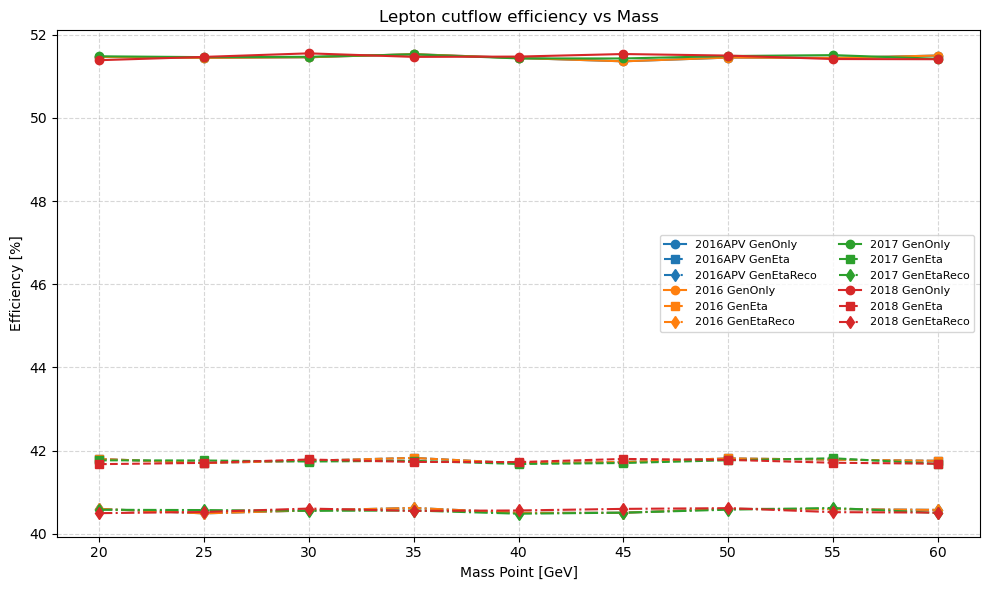

In [13]:
import re

years = ["2016APV", "2016", "2017", "2018"]
stages = ["GenOnly", "GenEta", "GenEtaReco"]

year_map = {
    "2016APV": "UL16NanoAODAPV",
    "2016":    "UL16NanoAOD",
    "2017":    "UL17NanoAOD",
    "2018":    "UL18NanoAOD",
}

# plotting styles
colors = {"2016APV":"tab:blue", "2016":"tab:orange", "2017":"tab:green", "2018":"tab:red"}
linestyles = {
    "GenOnly":"-",
    "GenEta":"--",
    "GenEtaReco":"-."
}
markers = {
    "GenOnly":"o",
    "GenEta":"s",
    "GenEtaReco":"d"
}

# --- Extract all available mass points from dataset names ---
all_masses = sorted(set(int(re.search(r"M(\d+)", d).group(1)) for d in datasets if "M" in d))

fig, ax = plt.subplots(figsize=(10,6))

for year in years:
    key = year_map[year]
    for stage in stages:
        vals = []
        for mass in all_masses:
            matching = [d for d in datasets if f"M{mass}" in d and key in d]
            if not matching:
                vals.append(np.nan)
                continue
            dset = matching[0]
            vals.append(eff_stages[dset][stage])   # take efficiency for this dataset/stage
        
        ax.plot(all_masses, vals, 
                color=colors[year], 
                linestyle=linestyles[stage], 
                marker=markers[stage], 
                label=f"{year} {stage}")

ax.set_xlabel("Mass Point [GeV]")
ax.set_ylabel("Efficiency [%]")
ax.set_title("Lepton cutflow efficiency vs Mass")
ax.grid(True, linestyle="--", alpha=0.5)

# Legend cleanup (remove duplicates)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=8, ncol=2)

plt.tight_layout()
plt.show()


In [42]:
eff_stages

{'M20_RunIISummer20UL16NanoAODAPVv9': {'GenOnly': 51.4656,
  'GenEta': 41.8,
  'GenEtaReco': 40.598800000000004,
  'FinalEvents': 202994},
 'M20_RunIISummer20UL16NanoAODv9': {'GenOnly': 51.4378,
  'GenEta': 41.748200000000004,
  'GenEtaReco': 40.677,
  'FinalEvents': 203385},
 'M20_RunIISummer20UL17NanoAODv9': {'GenOnly': 51.481100000000005,
  'GenEta': 41.7663,
  'GenEtaReco': 40.577400000000004,
  'FinalEvents': 405774},
 'M20_RunIISummer20UL18NanoAODv9': {'GenOnly': 51.38676028084252,
  'GenEta': 41.674022066198596,
  'GenEtaReco': 40.49608826479438,
  'FinalEvents': 403746},
 'M25_RunIISummer20UL16NanoAODAPVv9': {'GenOnly': 51.443286573146295,
  'GenEta': 41.70100200400802,
  'GenEtaReco': 40.49058116232465,
  'FinalEvents': 202048},
 'M25_RunIISummer20UL16NanoAODv9': {'GenOnly': 51.45380000000001,
  'GenEta': 41.7398,
  'GenEtaReco': 40.6736,
  'FinalEvents': 203368},
 'M25_RunIISummer20UL17NanoAODv9': {'GenOnly': 51.460899999999995,
  'GenEta': 41.7624,
  'GenEtaReco': 40.5701,
 

In [36]:
gen_ele_pt[0]

<Array [nan, 132, nan, 24.6, ..., nan, nan, nan, nan] type='988000 * float64'>

In [37]:
gen_mu_pt[0]

<Array [nan, nan, 68.8, nan, ..., 68.8, 26.1, nan, nan] type='988000 * float64'>

In [38]:
gen_ele_tauW_pt[0]

<Array [nan, nan, nan, nan, ..., nan, nan, 3.33, nan] type='988000 * float64'>

In [32]:
mask_ele[0]

<Array [False, True, False, ..., False, False, False] type='988000 * bool'>

In [34]:
mask_mu[0]

<Array [False, False, True, ..., True, False, False] type='988000 * bool'>

In [40]:
mask_any[0]

<Array [False, True, True, False, ..., True, False, False] type='988000 * bool'>

In [26]:
mask_ele

<Array [True] type='1 * bool'>

In [28]:
eff_stages['M20_RunIISummer20UL16NanoAODAPVv9']

{'LeptonSelection': 51.8944, 'FinalEvents': 259472}

In [5]:
# --- pT thresholds by year ---
pt_thresholds = {
    "UL16NanoAODAPV": {"ele": 27.0, "mu": 24.0, "tau": 27.0},
    "UL16NanoAOD":    {"ele": 27.0, "mu": 24.0, "tau": 27.0},
    "UL17NanoAOD":    {"ele": 32.0, "mu": 27.0, "tau": 27.0},
    "UL18NanoAOD":    {"ele": 32.0, "mu": 24.0, "tau": 27.0},
}

datasets = Data.dataset
eff_stages = {dset: {} for dset in datasets}

root_out = ROOT.TFile("LeptonCutFlow_Distributions.root", "RECREATE")

for dset in datasets:
    ds_events = Data[Data.dataset == dset]
    nEvents   = len(ds_events.nEvents[0])   # total events

    # --- Determine thresholds by dataset year ---
    pt_cfg = None
    for key, cfg in pt_thresholds.items():
        if key in dset:
            pt_cfg = cfg
            break
    if pt_cfg is None:
        raise RuntimeError(f"Could not determine year threshold for dataset {dset}")

    pt_ele = pt_cfg["ele"]
    pt_mu  = pt_cfg["mu"]
    pt_tau = pt_cfg["tau"]

    # --- GEN level ---
    gen_ele_pt      = ds_events["gen_ele_pt"]
    gen_ele_eta     = ds_events["gen_ele_eta"]
    gen_mu_pt       = ds_events["gen_mu_pt"]
    gen_mu_eta      = ds_events["gen_mu_eta"]
    gen_ele_tauW_pt = ds_events["gen_ele_tauW_pt"]
    gen_ele_tauW_eta= ds_events["gen_ele_tauW_eta"]
    gen_mu_tauW_pt = ds_events["gen_mu_tauW_pt"]
    gen_mu_tauW_eta= ds_events["gen_mu_tauW_eta"]

    # --- RECO matched ---
    reco_ele_pt     = ds_events["matched_reco_ele_pt"]
    reco_ele_eta    = ds_events["matched_reco_ele_eta"]
    reco_mu_pt      = ds_events["matched_reco_mu_pt"]
    reco_mu_eta     = ds_events["matched_reco_mu_eta"]
    reco_tau_ele_pt     = ds_events["matched_reco_ele_tau_pt"]
    reco_tau_ele_eta    = ds_events["matched_reco_ele_tau_eta"]
    reco_tau_mu_pt     = ds_events["matched_reco_mu_tau_pt"]
    reco_tau_mu_eta    = ds_events["matched_reco_mu_tau_eta"]

    # ---------------- STEP 1: GEN pT cuts ----------------
    mask_ele_gen = (gen_ele_pt > pt_ele) & ~np.isnan(gen_ele_pt)
    mask_mu_gen  = (gen_mu_pt > pt_mu)   & ~np.isnan(gen_mu_pt)
    mask_tau_ele_gen = (gen_ele_tauW_pt > pt_tau) & ~np.isnan(gen_ele_tauW_pt)
    mask_tau_mu_gen = (gen_mu_tauW_pt > pt_tau) & ~np.isnan(gen_mu_tauW_pt)

    mask_any_gen = mask_ele_gen | mask_mu_gen | mask_tau_ele_gen | mask_tau_mu_gen
    eff_stages[dset]["GenOnly"] = (np.sum(mask_any_gen) / nEvents) * 100.0

    # ---------------- STEP 2: GEN pT + η acceptance ----------------
    def eta_accept(eta):
        return ((np.abs(eta) < 1.442) | ((np.abs(eta) > 1.57) & (np.abs(eta) < 2.4)))

    mask_ele_eta = mask_ele_gen & eta_accept(gen_ele_eta)
    mask_mu_eta  = mask_mu_gen  & eta_accept(gen_mu_eta)
    mask_tau_ele_eta = mask_tau_ele_gen & eta_accept(gen_ele_tauW_eta)
    mask_tau_mu_eta = mask_tau_ele_gen & eta_accept(gen_mu_tauW_eta)

    mask_any_gen_eta = mask_ele_eta | mask_mu_eta | mask_tau_ele_eta | mask_tau_mu_eta
    eff_stages[dset]["GenEta"] = (np.sum(mask_any_gen_eta) / nEvents) * 100.0

    # ---------------- STEP 3: GEN+η + matched RECO ----------------
    mask_ele_reco = mask_ele_eta & (reco_ele_pt > pt_ele)
    mask_mu_reco  = mask_mu_eta  & (reco_mu_pt  > pt_mu)
    mask_tau_ele_reco = mask_tau_ele_eta & (reco_tau_ele_pt > pt_tau)
    mask_tau_mu_reco = mask_tau_mu_eta & (reco_tau_mu_pt > pt_tau)

    mask_any_reco = mask_ele_reco | mask_mu_reco | mask_tau_ele_reco | mask_tau_mu_reco
    eff_stages[dset]["GenEtaReco"] = (np.sum(mask_any_reco) / nEvents) * 100.0

    # also save absolute counts
    eff_stages[dset]["FinalEvents"] = int(np.sum(mask_any_reco))


In [7]:
# --- pT thresholds by year ---
pt_thresholds = {
    "UL16NanoAODAPV": {"ele": 27.0, "mu": 24.0, "tau": 27.0},
    "UL16NanoAOD":    {"ele": 27.0, "mu": 24.0, "tau": 27.0},
    "UL17NanoAOD":    {"ele": 32.0, "mu": 27.0, "tau": 27.0},
    "UL18NanoAOD":    {"ele": 32.0, "mu": 24.0, "tau": 27.0},
}

datasets = Data.dataset
eff_stages   = {dset: {} for dset in datasets}
count_stages = {dset: {} for dset in datasets}

root_out = ROOT.TFile("LeptonCutFlow_Distributions.root", "RECREATE")

for dset in datasets:
    ds_events = Data[Data.dataset == dset]
    nEvents   = len(ds_events.nEvents[0])   # total events
    count_stages[dset]["nEvents"] = int(nEvents)

    # --- Determine thresholds by dataset year ---
    pt_cfg = None
    for key, cfg in pt_thresholds.items():
        if key in dset:
            pt_cfg = cfg
            break
    if pt_cfg is None:
        raise RuntimeError(f"Could not determine year threshold for dataset {dset}")

    pt_ele = pt_cfg["ele"]
    pt_mu  = pt_cfg["mu"]
    pt_tau = pt_cfg["tau"]

    # --- GEN level ---
    gen_ele_pt      = ds_events["gen_ele_pt"]
    gen_ele_eta     = ds_events["gen_ele_eta"]
    gen_mu_pt       = ds_events["gen_mu_pt"]
    gen_mu_eta      = ds_events["gen_mu_eta"]
    gen_ele_tauW_pt = ds_events["gen_ele_tauW_pt"]
    gen_ele_tauW_eta= ds_events["gen_ele_tauW_eta"]
    gen_mu_tauW_pt = ds_events["gen_mu_tauW_pt"]
    gen_mu_tauW_eta= ds_events["gen_mu_tauW_eta"]

    # --- RECO matched ---
    reco_ele_pt     = ds_events["matched_reco_ele_pt"]
    reco_ele_eta    = ds_events["matched_reco_ele_eta"]
    reco_mu_pt      = ds_events["matched_reco_mu_pt"]
    reco_mu_eta     = ds_events["matched_reco_mu_eta"]
    reco_tau_ele_pt     = ds_events["matched_reco_ele_tau_pt"]
    reco_tau_ele_eta    = ds_events["matched_reco_ele_tau_eta"]
    reco_tau_mu_pt     = ds_events["matched_reco_mu_tau_pt"]
    reco_tau_mu_eta    = ds_events["matched_reco_mu_tau_eta"]
    Genmatched_pho_1_pt    = ds_events["Genmatched_pho_1_pt"]
    Genmatched_pho_2_pt    = ds_events["Genmatched_pho_2_pt"]

    # ---------------- STEP 1: GEN pT cuts ----------------
    mask_ele_gen = (gen_ele_pt > pt_ele) & ~np.isnan(gen_ele_pt)
    mask_mu_gen  = (gen_mu_pt > pt_mu)   & ~np.isnan(gen_mu_pt)
    mask_tau_ele_gen = (gen_ele_tauW_pt > pt_tau) & ~np.isnan(gen_ele_tauW_pt)
    mask_tau_mu_gen = (gen_mu_tauW_pt > pt_tau) & ~np.isnan(gen_mu_tauW_pt)

    mask_any_gen = mask_ele_gen | mask_mu_gen | mask_tau_ele_gen | mask_tau_mu_gen
    count1 = ak.sum(mask_any_gen)
    eff_stages[dset]["GenOnly"] = (np.sum(mask_any_gen) / nEvents) * 100.0
    count_stages[dset]["GenOnly"] = int(count1)

    # ---------------- STEP 2: GEN pT + η acceptance ----------------
    def eta_accept(eta):
        return ((np.abs(eta) < 1.442) | ((np.abs(eta) > 1.57) & (np.abs(eta) < 2.4)))

    mask_ele_eta = mask_ele_gen & eta_accept(gen_ele_eta)
    mask_mu_eta  = mask_mu_gen  & eta_accept(gen_mu_eta)
    mask_tau_ele_eta = mask_tau_ele_gen & eta_accept(gen_ele_tauW_eta)
    mask_tau_mu_eta = mask_tau_ele_gen & eta_accept(gen_mu_tauW_eta)

    mask_any_gen_eta = mask_ele_eta | mask_mu_eta | mask_tau_ele_eta | mask_tau_mu_eta
    count2 = ak.sum(mask_any_gen_eta)
    eff_stages[dset]["GenEta"] = (np.sum(mask_any_gen_eta) / nEvents) * 100.0
    count_stages[dset]["GenEta"] = int(count2)

    # ---------------- STEP 3: GEN+η + matched RECO ----------------
    mask_ele_reco = mask_ele_eta & (reco_ele_pt > pt_ele)
    mask_mu_reco  = mask_mu_eta  & (reco_mu_pt  > pt_mu)
    mask_tau_ele_reco = mask_tau_ele_eta & (reco_tau_ele_pt > pt_tau)
    mask_tau_mu_reco = mask_tau_mu_eta & (reco_tau_mu_pt > pt_tau)

    mask_any_reco_lep = mask_ele_reco | mask_mu_reco | mask_tau_ele_reco | mask_tau_mu_reco
    count3 = ak.sum(mask_any_reco_lep)
    eff_stages[dset]["GenEtaRecolep"] = (np.sum(mask_any_reco_lep) / nEvents) * 100.0
    count_stages[dset]["GenEtaRecolep"] = int(count3)

    # -----------------STEP 4: GEN+η + matched RECO + Additional diphoton --------------------
    # mask_pho_reco_1 = mask_any_reco_lep & (Genmatched_pho_1_pt > 15.0) & (Genmatched_pho_2_pt > 15.0)
    mask_pho_reco = mask_any_reco_lep & (Genmatched_pho_1_pt > 15.0) & (Genmatched_pho_2_pt > 15.0)
    # mask_pho_reco = mask_pho_reco_1 & (Genmatched_pho_2_pt > 15.0)

    mask_any_reco = (mask_ele_reco | mask_mu_reco | mask_tau_ele_reco | mask_tau_mu_reco) & mask_pho_reco
    count4 = ak.sum(mask_any_reco)
    eff_stages[dset]["GenEtaReco"] = (np.sum(mask_any_reco) / nEvents) * 100.0
    count_stages[dset]["GenEtaReco"] = int(count4)


    # also save absolute counts
    eff_stages[dset]["FinalEvents"] = int(np.sum(mask_any_reco))

In [8]:
count_stages

{'M20_RunIISummer20UL16NanoAODAPVv9': {'nEvents': 500000,
  'GenOnly': 262387,
  'GenEta': 209000,
  'GenEtaRecolep': 202994,
  'GenEtaReco': 76529},
 'M20_RunIISummer20UL16NanoAODv9': {'nEvents': 500000,
  'GenOnly': 262177,
  'GenEta': 208741,
  'GenEtaRecolep': 203385,
  'GenEtaReco': 76541},
 'M20_RunIISummer20UL17NanoAODv9': {'nEvents': 1000000,
  'GenOnly': 482449,
  'GenEta': 384593,
  'GenEtaRecolep': 373431,
  'GenEtaReco': 141431},
 'M20_RunIISummer20UL18NanoAODv9': {'nEvents': 997000,
  'GenOnly': 495449,
  'GenEta': 394461,
  'GenEtaRecolep': 383525,
  'GenEtaReco': 144850},
 'M25_RunIISummer20UL16NanoAODAPVv9': {'nEvents': 499000,
  'GenOnly': 261748,
  'GenEta': 208088,
  'GenEtaRecolep': 202048,
  'GenEtaReco': 75831},
 'M25_RunIISummer20UL16NanoAODv9': {'nEvents': 500000,
  'GenOnly': 262350,
  'GenEta': 208699,
  'GenEtaRecolep': 203368,
  'GenEtaReco': 77022},
 'M25_RunIISummer20UL17NanoAODv9': {'nEvents': 1000000,
  'GenOnly': 482001,
  'GenEta': 384482,
  'GenEtaRec

In [9]:
import cutflow_table as ct

ct.make_cutflow_table(count_stages, "WH_cutflow_table_lepton_trigger.xlsx")


Saved WH_cutflow_table_lepton_trigger.xlsx with preserved column order and efficiency column.


In [11]:
mask_any_reco[0]

<Array [False, False, True, ..., False, False, False] type='988000 * bool'>

In [13]:
Genmatched_pho_1_pt[0]

<Array [nan, nan, 46.9, 45.8, ..., 49, 82.7, 32.3, 326] type='472192 * float64'>

In [ ]:
%jsroot on
# --- Remove NaNs ---
arr_clean = gen_mu_tauW_eta[0][~np.isnan(gen_mu_tauW_eta[0])]

# --- Define histogram ---
h = ROOT.TH1F("h", "Example Histogram;X;Entries", 50, 1, -1)

# --- Fill histogram ---
for val in arr_clean:
    h.Fill(val)

# --- Draw ---
c = ROOT.TCanvas("c", "c", 800, 600)
h.Draw()
c.Draw()
c.SaveAs("hist.png")


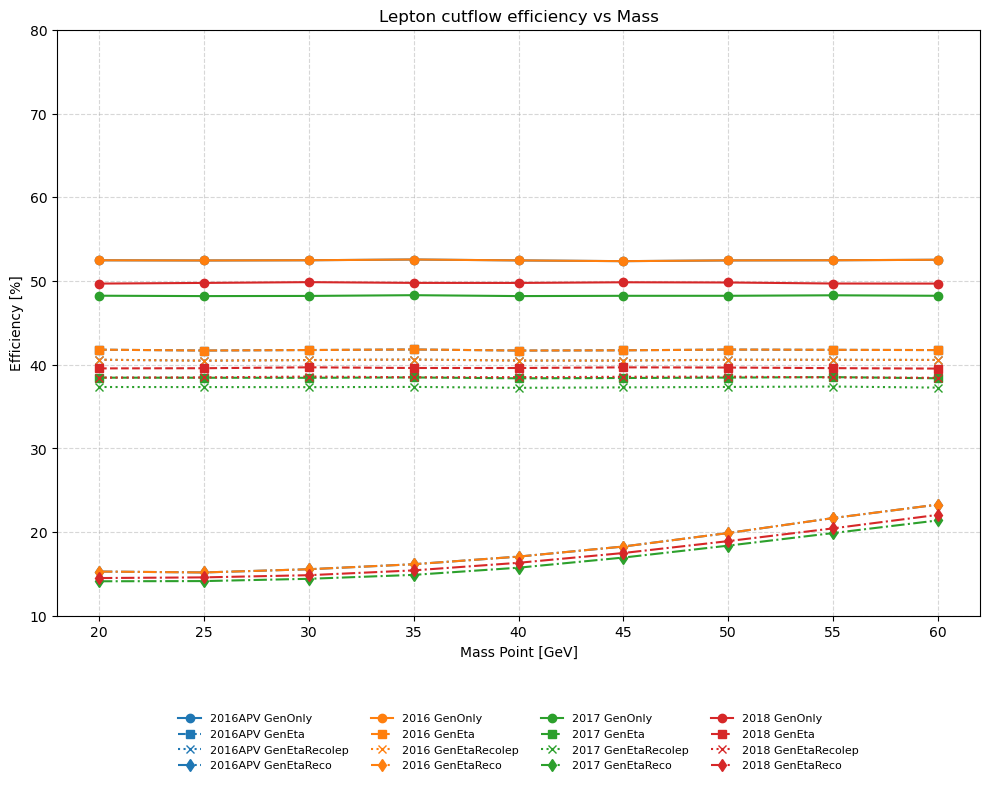

In [5]:
import re

years = ["2016APV", "2016", "2017", "2018"]
stages = ["GenOnly", "GenEta", "GenEtaRecolep", "GenEtaReco"]

year_map = {
    "2016APV": "UL16NanoAODAPV",
    "2016":    "UL16NanoAOD",
    "2017":    "UL17NanoAOD",
    "2018":    "UL18NanoAOD",
}

# plotting styles
colors = {"2016APV":"tab:blue", "2016":"tab:orange", "2017":"tab:green", "2018":"tab:red"}
linestyles = {
    "GenOnly":"-",
    "GenEta":"--",
    "GenEtaRecolep": ":",
    "GenEtaReco":"-."
}
markers = {
    "GenOnly":"o",
    "GenEta":"s",
    "GenEtaRecolep":"x",
    "GenEtaReco":"d"
}

# --- Extract all available mass points from dataset names ---
all_masses = sorted(set(int(re.search(r"M(\d+)", d).group(1)) for d in datasets if "M" in d))

fig, ax = plt.subplots(figsize=(10,8))

for year in years:
    key = year_map[year]
    for stage in stages:
        vals = []
        for mass in all_masses:
            matching = [d for d in datasets if f"M{mass}" in d and key in d]
            if not matching:
                vals.append(np.nan)
                continue
            dset = matching[0]
            vals.append(eff_stages[dset][stage])   # take efficiency for this dataset/stage
        
        ax.plot(all_masses, vals, 
                color=colors[year], 
                linestyle=linestyles[stage], 
                marker=markers[stage], 
                label=f"{year} {stage}")

ax.set_xlabel("Mass Point [GeV]")
ax.set_ylabel("Efficiency [%]")
ax.set_title("Lepton cutflow efficiency vs Mass")
ax.grid(True, linestyle="--", alpha=0.5)

# Legend cleanup (remove duplicates)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# ax.legend(loc = 'best', by_label.values(), by_label.keys(), fontsize=8, ncol=2)
ax.legend(by_label.values(),
          by_label.keys(),
          loc='upper center',       # anchor legend at the top
          bbox_to_anchor=(0.5, -0.15),  # shift it below the plot
          fontsize=8,
          ncol=4,                   # increase columns for compactness
          frameon=False)            # optional: remove legend box


plt.tight_layout()
plt.ylim(10,80)
plt.show()